In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
sr = 0.75
arrival_rates = [0.2, 0.4, 0.5, 0.6, 0.65, 0.7, 0.72, 0.745]


<function matplotlib.pyplot.show(close=None, block=None)>

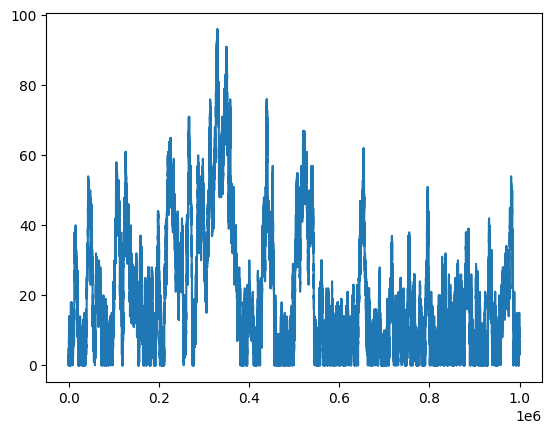

In [24]:
results = []

for ar in arrival_rates:
    server = [0]

    next_arrival_time = np.random.geometric(ar, 1)[0]
    next_service_time = np.random.geometric(sr, 1)[0]

    for i in range(1, 10**6):
        server.append(server[i-1])

        # arrivals
        if next_arrival_time == 0:
            next_arrival_time = np.random.geometric(ar, 1)[0]
            server[i] += 1
        else:
            next_arrival_time -= 1

        # services
        if server[i] > 0:
            if next_service_time == 0:
                next_service_time = np.random.geometric(sr, 1)[0]
                server[i] -= 1
            else:
                next_service_time -= 1
        else:
            next_service_time = np.random.geometric(sr, 1)[0]
    
    results.append({'Arrival Rate' : ar, 'Server' : server})



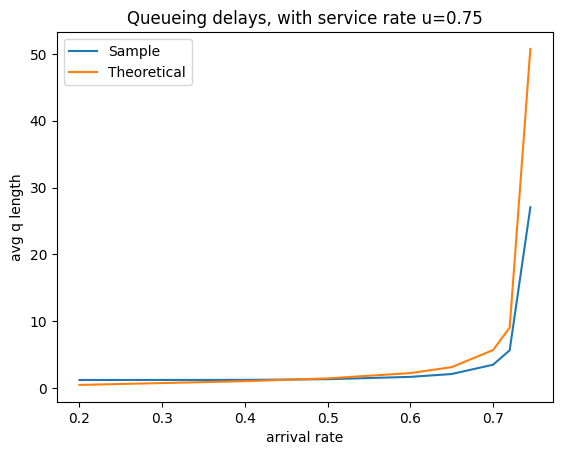

In [42]:
plt.figure()
q = [np.mean(x['Server'])/x['Arrival Rate'] for x in results]
plt.plot(arrival_rates, q)


t = []
for ar in arrival_rates:
    alpha = ar / ((1-ar) * sr)
    beta = (ar * (1-sr)) / ((1-ar)*ar)
    E = alpha / ( (1 - beta) * (1 + alpha - beta) )
    t.append(E)

plt.plot(arrival_rates, t)
plt.legend(['Sample', 'Theoretical'])






plt.title("Queueing delays, with service rate u=0.75")
plt.xlabel("arrival rate")
plt.ylabel("avg q length")
plt.show()

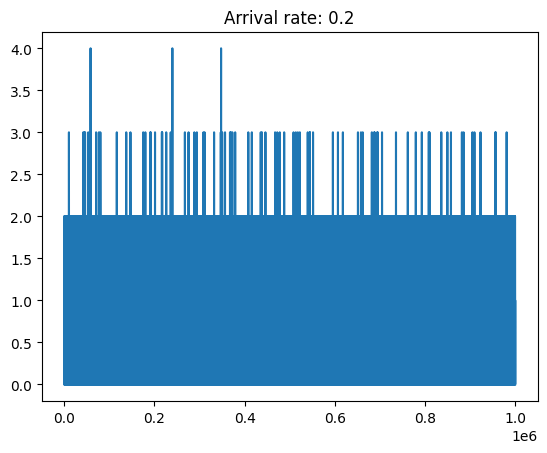

Avg Queue length: 0.241989
Avg queue delay: 1.209945


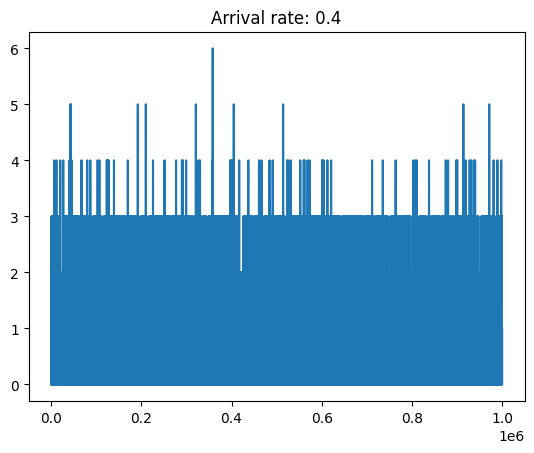

Avg Queue length: 0.490018
Avg queue delay: 1.225045


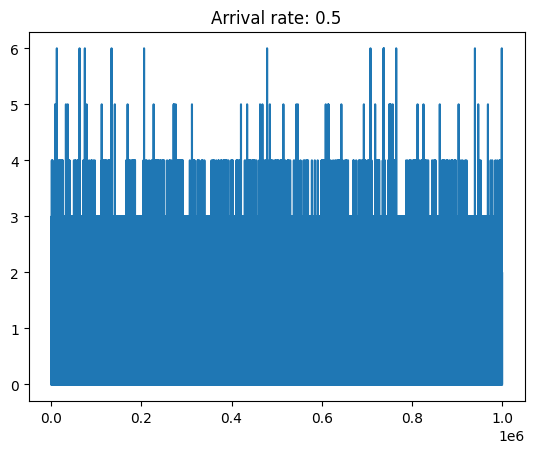

Avg Queue length: 0.666916
Avg queue delay: 1.333832


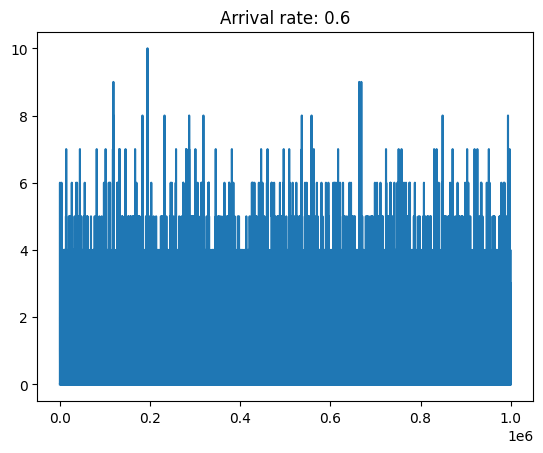

Avg Queue length: 1.006824
Avg queue delay: 1.67804


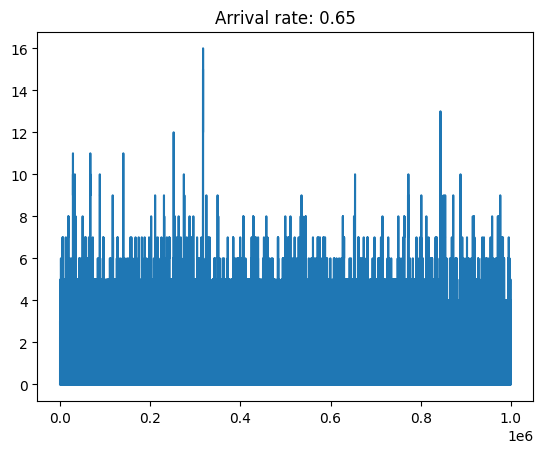

Avg Queue length: 1.370653
Avg queue delay: 2.108696923076923


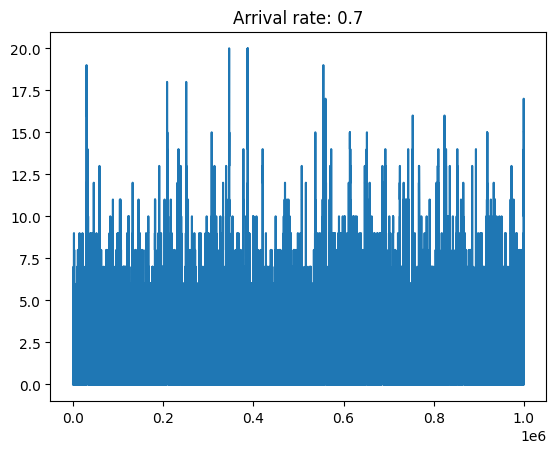

Avg Queue length: 2.449874
Avg queue delay: 3.49982


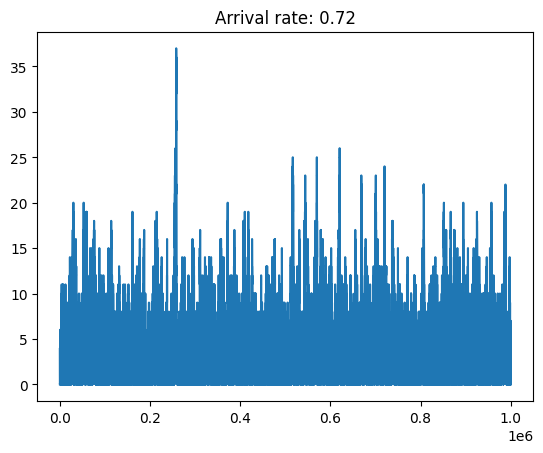

Avg Queue length: 4.074296
Avg queue delay: 5.658744444444445


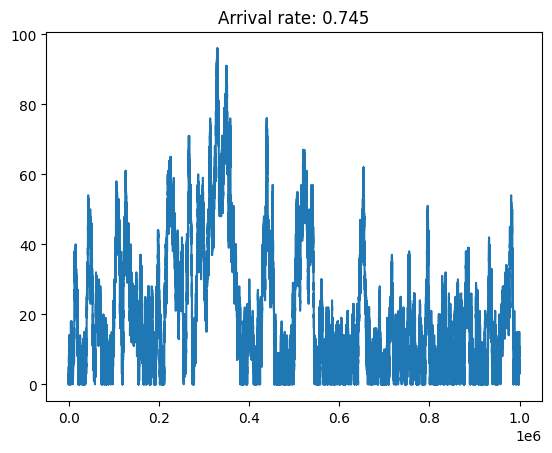

Avg Queue length: 20.155621
Avg queue delay: 27.054524832214764


In [35]:
for result in results:
    plt.figure()
    plt.plot(result['Server'])
    plt.title("Arrival rate: " + str(result['Arrival Rate']))
    plt.show()

    avg_q_len = np.mean(result['Server'])
    print("Avg Queue length:", avg_q_len)
    print("Avg queue delay:", avg_q_len/result['Arrival Rate'])